# How to Form a Good Cointegrating (and Mean-Reverting) Pair of Stocks

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
from statsmodels.tsa.stattools import coint

In [5]:
from statsmodels.api import OLS

In [6]:
from scipy.stats import pearsonr

In [7]:
df1=pd.read_excel('KO.xls')

In [8]:
df2=pd.read_excel('PEP.xls')

In [9]:
df=pd.merge(df1, df2, on='Date', suffixes=('_KO', '_PEP'))

In [10]:
df.set_index('Date', inplace=True)

In [11]:
df.sort_index(inplace=True)

## Run cointegration (Engle-Granger) test

In [12]:
coint_t, pvalue, crit_value=coint(df['Adj Close_KO'], df['Adj Close_PEP'])

In [13]:
(coint_t, pvalue, crit_value) # abs(t-stat) < critical value at 90%. pvalue says probability of null hypothesis (of no cointegration) is 73%

(-1.581551704151715,
 0.7286134576473537,
 array([-3.89783854, -3.33691006, -3.04499143]))

## Determine hedge ratio

In [14]:
model=OLS(df['Adj Close_KO'], df['Adj Close_PEP'])

In [15]:
results=model.fit()

In [16]:
hedgeRatio=results.params

In [17]:
hedgeRatio

Adj Close_PEP    1.011409
dtype: float64

##  spread = KO - hedgeRatio*PEP

In [18]:
spread=df['Adj Close_KO']-hedgeRatio[0]*df['Adj Close_PEP']

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


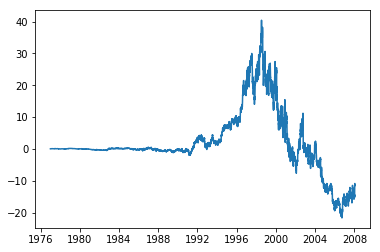

In [19]:
plt.plot(spread) # Figure 7.2

## Correlation test

In [20]:
dailyret=df.loc[:, ('Adj Close_KO', 'Adj Close_PEP')].pct_change()

In [21]:
dailyret.corr()

,Adj Close_KO,Adj Close_PEP
Adj Close_KO,1.000000,0.484924
Adj Close_PEP,0.484924,1.000000


In [22]:
dailyret_clean=dailyret.dropna()

In [23]:
pearsonr(dailyret_clean.iloc[:,0], dailyret_clean.iloc[:,1]) # first output is correlation coefficient, second output is pvalue.

(0.4849239439370571, 0.0)